**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
import scipy
import operator
import collections

In [4]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

def getNeighbors(X, s, k):
    distances = np.empty(0)
    return np.argsort(((X - np.tile(s, X.shape[0]).reshape((X.shape[0], X.shape[1])))**2).sum(axis=1)**0.5)[0:k]

In [6]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        return None
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.array(y)
        return 0
        

    
    def predict(self, X):
        y_pred = np.empty(0)
        for i in range(len(X)):
            l = getNeighbors(self.X, X[i], self.n_neighbors)
            y_pred = np.append(y_pred,np.array([np.argmax(np.bincount(self.y[l]))]))
        return y_pred



In [7]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf.fit(X_train, y_train)
my_clf.predict(X_test)

array([2., 1., 2., 0., 2., 1., 1., 1., 2., 0., 0., 0., 0., 1., 1.])

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [8]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [9]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

0

In [10]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [11]:
%time clf.fit(X_train, y_train)

CPU times: user 739 µs, sys: 214 µs, total: 953 µs
Wall time: 812 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [12]:
%time my_clf.fit(X_train, y_train)

CPU times: user 45 µs, sys: 19 µs, total: 64 µs
Wall time: 215 µs


0

In [13]:
%time clf.predict(X_test)

CPU times: user 2.24 ms, sys: 183 µs, total: 2.42 ms
Wall time: 4.62 ms


array([2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1])

In [14]:
%time my_clf.predict(X_test)

CPU times: user 1.67 ms, sys: 120 µs, total: 1.79 ms
Wall time: 3.59 ms


array([2., 1., 2., 0., 2., 1., 1., 1., 2., 0., 0., 0., 0., 1., 1.])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [15]:
import sklearn.neighbors

In [16]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='kd_tree'):
        self.n_neighbors = n_neighbors
        return None
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.array(y)
        self.tree = sklearn.neighbors.KDTree(X_train, leaf_size=2,metric='euclidean')
        return 0
        

    
    def predict(self, X):
        dist, ind = self.tree.query(X,k=2) 
        return self.y[ind.T[0]]
        

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 930 µs, sys: 304 µs, total: 1.23 ms
Wall time: 1.37 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 372 µs, sys: 172 µs, total: 544 µs
Wall time: 453 µs


0

In [21]:
%time clf.predict(X_test)

CPU times: user 2.51 ms, sys: 1.28 ms, total: 3.79 ms
Wall time: 3.9 ms


array([0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0])

In [22]:
%time my_clf.predict(X_test)

CPU times: user 370 µs, sys: 34 µs, total: 404 µs
Wall time: 590 µs


array([0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0])

In [23]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [24]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
target_train = newsgroups['target']

In [25]:
data = newsgroups['data']
target = newsgroups['target']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [27]:
X = vectorizer.fit_transform(data)
X = X.toarray()
X.shape

(11314, 10739)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [29]:
X.shape

(11314, 10739)

In [30]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
cross_val_score(clf,X,target,cv = cv,scoring='accuracy')

array([0.18727915, 0.18639576, 0.21201413])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neighbors = list(range(1,11))
cv_scores = [ ]
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K, algorithm='brute')
    scores = cross_val_score(knn,X,target,cv = cv,scoring='accuracy')
    cv_scores.append(scores.mean())

In [32]:
# determing best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 1


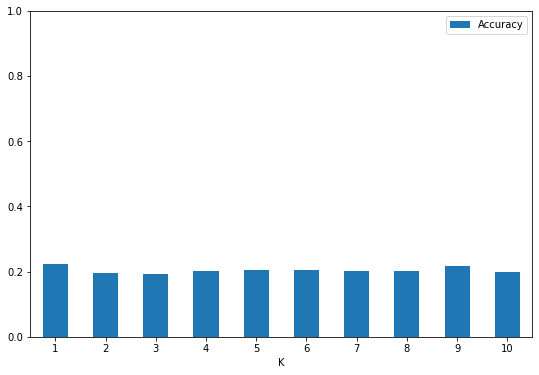

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,11)], "Accuracy":cv_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [34]:
import sklearn
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
X = vectorizer.fit_transform(data)

In [35]:
neighbors = list(range(1,11))
cv_scores = [ ]
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K,metric='cosine')
    scores = cross_val_score(knn,X,target,cv = cv)
    cv_scores.append(scores.mean())

In [36]:
cv_scores

[0.625736160188457,
 0.5909893992932863,
 0.589811542991755,
 0.5951118963486455,
 0.6045347467608951,
 0.5998233215547704,
 0.6024734982332155,
 0.606301531213192,
 0.582449941107185,
 0.5853945818610129]

    Лучшая модель вторая

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [37]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
target_test = newsgroups.target

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [38]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(vocabulary = set(data))
X_test = vectorizer.fit_transform(newsgroups.data)
X = vectorizer.fit_transform(data)

In [39]:
len(set(data))

10994

In [40]:
len(set(data) and set(newsgroups.data))

7311

In [41]:
print(X_test.shape)
X.shape

(7532, 10994)


(11314, 10994)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 1,metric='cosine')
knn.fit(X, target_train)
score = knn.score(X_test,target_test)

In [43]:
score

0.0525756771109931

    Такое отличие на кросс-валидации и тесте могли получить из-за того, что мы переобучились. Еще есть вариант, что  train часть текста очень не похожа на test. Также причина может быть в модели, а конкретно в том, что мы не учитываем сочетания слов.